# Problema das N-Rainhas
<p>Posicionar N rainhas em um tabuleiro NxN de tal forma que elas não se ataquem </p>
<p>Versão: 1.0</p>
<p>Data: 17.04.2025</p>

In [57]:
# Importar bibliotecas necessárias

import matplotlib.pyplot as plt
import math
import random
import copy
from tqdm.notebook import trange


### Funções Auxiliares

In [4]:
# Representar e gerar tabuleiro
def geraTabulerio(tamanho):
  if tamanho < 4 : return [-1] # tabuleiro deve ter no minimo 2 casas
  tabuleiro = [] # gera o tabuleiro
  for i in range(tamanho): # para cada linha do tabuleiro
    tabuleiro.append([]) # adiciona uma linha vazia
    for j in range(tamanho): # para cada coluno dessa linha
      tabuleiro[i].append(0) # adiciona o valor 0
  for i in range(tamanho): # para cada linha to tabuleiro
    tabuleiro[i][0] = 1 # colocar o valor 1 na coluna 0
  return tabuleiro # retorna o tabuleiro

In [5]:
print(geraTabulerio(6))

[[1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0]]


In [6]:
# Função para printar o tabuleiro de forma mais harmonica
def printTabuleiro(tab):
  for i in range(len(tab)):
    print(tab[i])

In [7]:
printTabuleiro(geraTabulerio(4))

[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]


In [8]:
# Localizar Rainhas no tabuleiro
def locateQueens(estado):
  q = [] # vetor com as posições das rainhas
  for i in range(len(estado)): # verifica cada linha
    for j in range(len(estado)): # verifica cada coluna
      if estado[i][j] == 1 : q.append((i,j)) # se a casa tiver o
                                             # o valor 1, adiciona
                                             # a posição i,j no vetor
  return q # retorna o vertor com as posições das rainhas

In [9]:
print(locateQueens(geraTabulerio(4)))

[(0, 0), (1, 0), (2, 0), (3, 0)]


In [10]:
# Verificar quanto ataques existem no tabulerios
def calAtaques(estado):
  at = 0 # inicia a contagem com 0 ataques
  atlinhas = 0 # inicia a verificação de ataques em linhas
  # ataques em linhas
  for i in estado: # para cada linha no tabuleiro
    if sum(i)>1: # verifica se a soma da linha é maior que 1
      atlinhas += sum(i)-1 # se for adiciona o valor da soma a atlinhas
  at += atlinhas # adiciona o valor de atlinhas a at

  # ataques em colunas
  atcolunas = 0 # inicia a verificação de ataques em colunas
  for c in range(len(estado)):
    nl = 0
    for l in range(len(estado)): nl += estado[l][c]
    if nl>1: atcolunas += nl - 1
  at += atcolunas # adiciona o valor de atcolunas a at

  # ataques nas diagonais
  pr = locateQueens(estado)
  d = 0
  for p, coords in enumerate(pr):
    i,j = coords
    # diagonal esquerda
    k,w = i+1, j-1
    while (w>=0 and k<len(estado)):
      if estado[k][w] == 1:
        d+=1
        break
      w-=1
      k+=1
    # diagonal direita
    l,c = i+1, j+1
    while(l< len(estado) and c<len(estado)):
      if estado[l][c] == 1:
        d+=1
        break
      l+=1
      c+=1
  at += d
  return at



In [11]:
print(calAtaques(geraTabulerio(5)))

4


In [12]:
# mover uma rainha aleatoria
def moveRainhaAleatoria(estado, casa):
  tam=len(estado)
  while True:
    i,j = random.choice(locateQueens(estado))
    k = (j+casa)%tam
    if estado[i][k] == 0:
      estado[i][k], estado[i][j] = estado[i][j], estado[i][k]
      break
  return estado

In [13]:
printTabuleiro(moveRainhaAleatoria(geraTabulerio(4),2))

[1, 0, 0, 0]
[0, 0, 1, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]


In [14]:
# Função para gerar gráfico do desempenho

def graficoAtaques(ataques):
  x = range(len(ataques))
  plt.plot(x, ataques)
  plt.xlabel("iterações")
  plt.ylabel("Ataques Evitados")
  plt.title("Evolução dos ataques")
  #plt.legend(loc="best")
  plt.show()

### Busca Cega
<p>Busca em Profundidade</p>

In [15]:
# função para busca em profundidade
def buscaProfundidade(estado, casa, max):
  n = len(estado[0])
  ataques = []
  i = 0
  # calular máximo de ataques no tabuleiro
  maxAtaques = math.factorial(n)/(2*math.factorial(n-2))

  while i <= max:
    atq = calAtaques(estado)
    ataques.append(maxAtaques - atq)
    if atq == 0:
      print("Sucesso!")
      tab = estado
      return ataques, tab
    estado = moveRainhaAleatoria(copy.deepcopy(estado), casa)
    i += 1
  print("Falha!")
  tab = estado
  return ataques, tab

Falha!
[0, 0, 1, 0]
[0, 0, 1, 0]
[1, 0, 0, 0]
[0, 0, 1, 0]


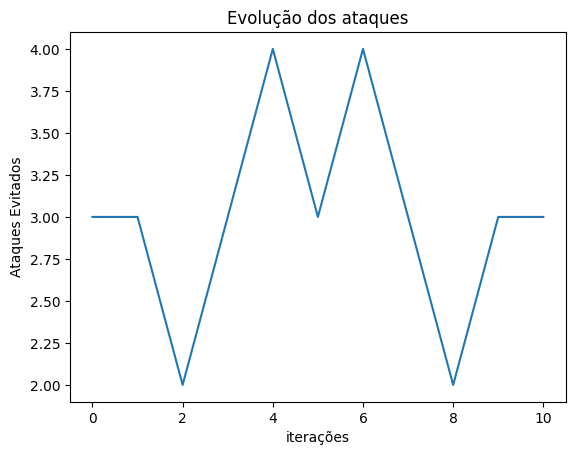

In [20]:
# Testando a busca em profundidade
ataque, tab = buscaProfundidade(geraTabulerio(4), 2, 10)
printTabuleiro(tab)
graficoAtaques(ataque)


## HILL CLIMBING

In [29]:
def hillClimbing(estado, passo):
    c=0
    n=len(estado[0])
    maxAtaques = math.factorial(n)/(2*math.factorial(n-2))
    ataques = []

    while c <= maxAtaques:
        change = False

        atq = calAtaques(estado)
        ataques.append(maxAtaques-atq)
        if atq == 0:
            return "SOLUCAO", estado, atq, ataques
        
        suc = moveRainhaAleatoria(copy.deepcopy(estado), passo)
        if calAtaques(suc) <= atq:
            estado = suc
            change = True
        if not change:
            c += 1
        
    return "Falha", estado, atq, ataques
        



Busca executada com:  Falha
ultimo estado analisado: 
[0, 1, 0, 0]
[0, 0, 0, 1]
[0, 0, 1, 0]
[0, 0, 1, 0]


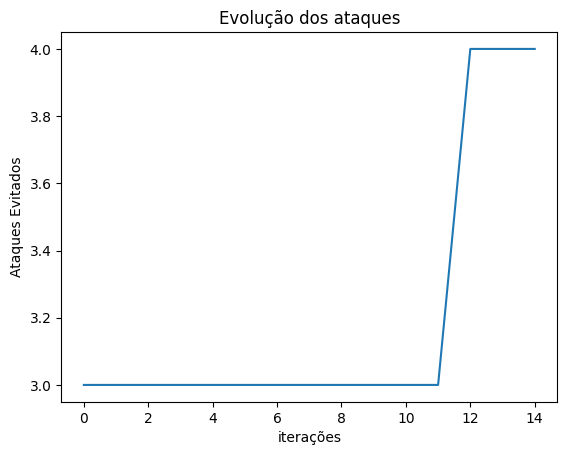

In [54]:

m,e,a,y = hillClimbing(geraTabulerio(4), 1)
print("Busca executada com: ",m)
print("ultimo estado analisado: ")
printTabuleiro(e)
graficoAtaques(y)


----

## Melhoramento para o Hill Climbing

Uma vez que o Hill Climbing é propenso a para no ótimo local, poderiamos fazer o algoritmo executar até encontrar uma solução, e quando encontrada essa solução e salva e uma nova posição aleatória é dada para ele, sendo executado $n$ vezes. Assim, ao final das $n$ execuções teremos uma lista de $n$ combinações para o ótimo global, e então podemos compara e encontrar o mais proximo do ótimo global.

Esse não seria o método mais eficiente, sendo $O(nm)$ do qual $n$ é a quantidade de iterações e $m$ o valor máximo de combinações de ataques.

In [55]:
def tabuleiro_aleatorio(tamanho):
    tabuleiro = geraTabulerio(tamanho)
    passo = 1 # poderia ser um valor aleatório
    for _ in range(tamanho):
        tabuleiro = moveRainhaAleatoria(copy.deepcopy(tabuleiro), passo) 
    return tabuleiro 



In [208]:
def hillClimbing_2(tamanho_tabuleiro, n=5):
    otimos=[]

    for i in range(n):
        print("tentativa %d"%(i))
        tabuleiro = tabuleiro_aleatorio(tamanho_tabuleiro)
        passo = random.randint(1, tamanho_tabuleiro-1)
        result = hillClimbing(tabuleiro, passo)
        otimos.append([*result, passo])
    
    menor_ataques = 1_000_000
    otimo_global = None
    for solucao in otimos:
        ataques = solucao[-3]

        if(ataques < menor_ataques):
            otimo_global = solucao
            menor_ataques = ataques 
    return otimo_global

tentativa 0
tentativa 1
tentativa 2
tentativa 3
tentativa 4
tentativa 5
tentativa 6
tentativa 7
tentativa 8
tentativa 9
tentativa 10
tentativa 11
tentativa 12
tentativa 13
tentativa 14
tentativa 15
tentativa 16
tentativa 17
tentativa 18
tentativa 19
tentativa 20
tentativa 21
tentativa 22
tentativa 23
tentativa 24
tentativa 25
tentativa 26
tentativa 27
tentativa 28
tentativa 29
tentativa 30
tentativa 31
tentativa 32
tentativa 33
tentativa 34
tentativa 35
tentativa 36
tentativa 37
tentativa 38
tentativa 39
tentativa 40
tentativa 41
tentativa 42
tentativa 43
tentativa 44
tentativa 45
tentativa 46
tentativa 47
tentativa 48
tentativa 49
tentativa 50
tentativa 51
tentativa 52
tentativa 53
tentativa 54
tentativa 55
tentativa 56
tentativa 57
tentativa 58
tentativa 59
tentativa 60
tentativa 61
tentativa 62
tentativa 63
tentativa 64
tentativa 65
tentativa 66
tentativa 67
tentativa 68
tentativa 69
tentativa 70
tentativa 71
tentativa 72
tentativa 73
tentativa 74
tentativa 75
tentativa 76
tentativa

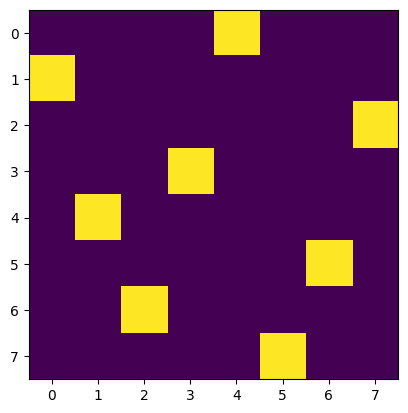

In [213]:
resultado = hillClimbing_2(8, n=10000)
print(resultado)
plt.imshow(resultado[1])
